In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm 
import seaborn as sns

import numpy as np
import pandas as pd


In [52]:
# Get the data for model and text 
df_model= pd.read_excel('Dataset_work_17Oct.xlsx', sheet_name='Model')

#print(df_model)


# set the X (as features for model) and y (target data - task information )
X_modelData = pd.DataFrame(df_model,columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt', 'weight','height', 'age', 'gender'])


# preprocessing of the all the data is performed 

from sklearn.preprocessing import StandardScaler            # seams standscalar is doing better
std_scaler = StandardScaler()

X_modelData_scaled = std_scaler.fit_transform(X_modelData)                          
                        
 
data_features=columns=['std_rr','skew_rr','mean_rr','std_acc','skew_acc','mean_acc','mean_gra','std_gra','skew_gra', 'std_alt', 'skew_alt','mean_alt','weight', 'height', 'age', 'gender']


In [53]:
# Data for modelling 
X=X_modelData_scaled  #


# Know about the features 

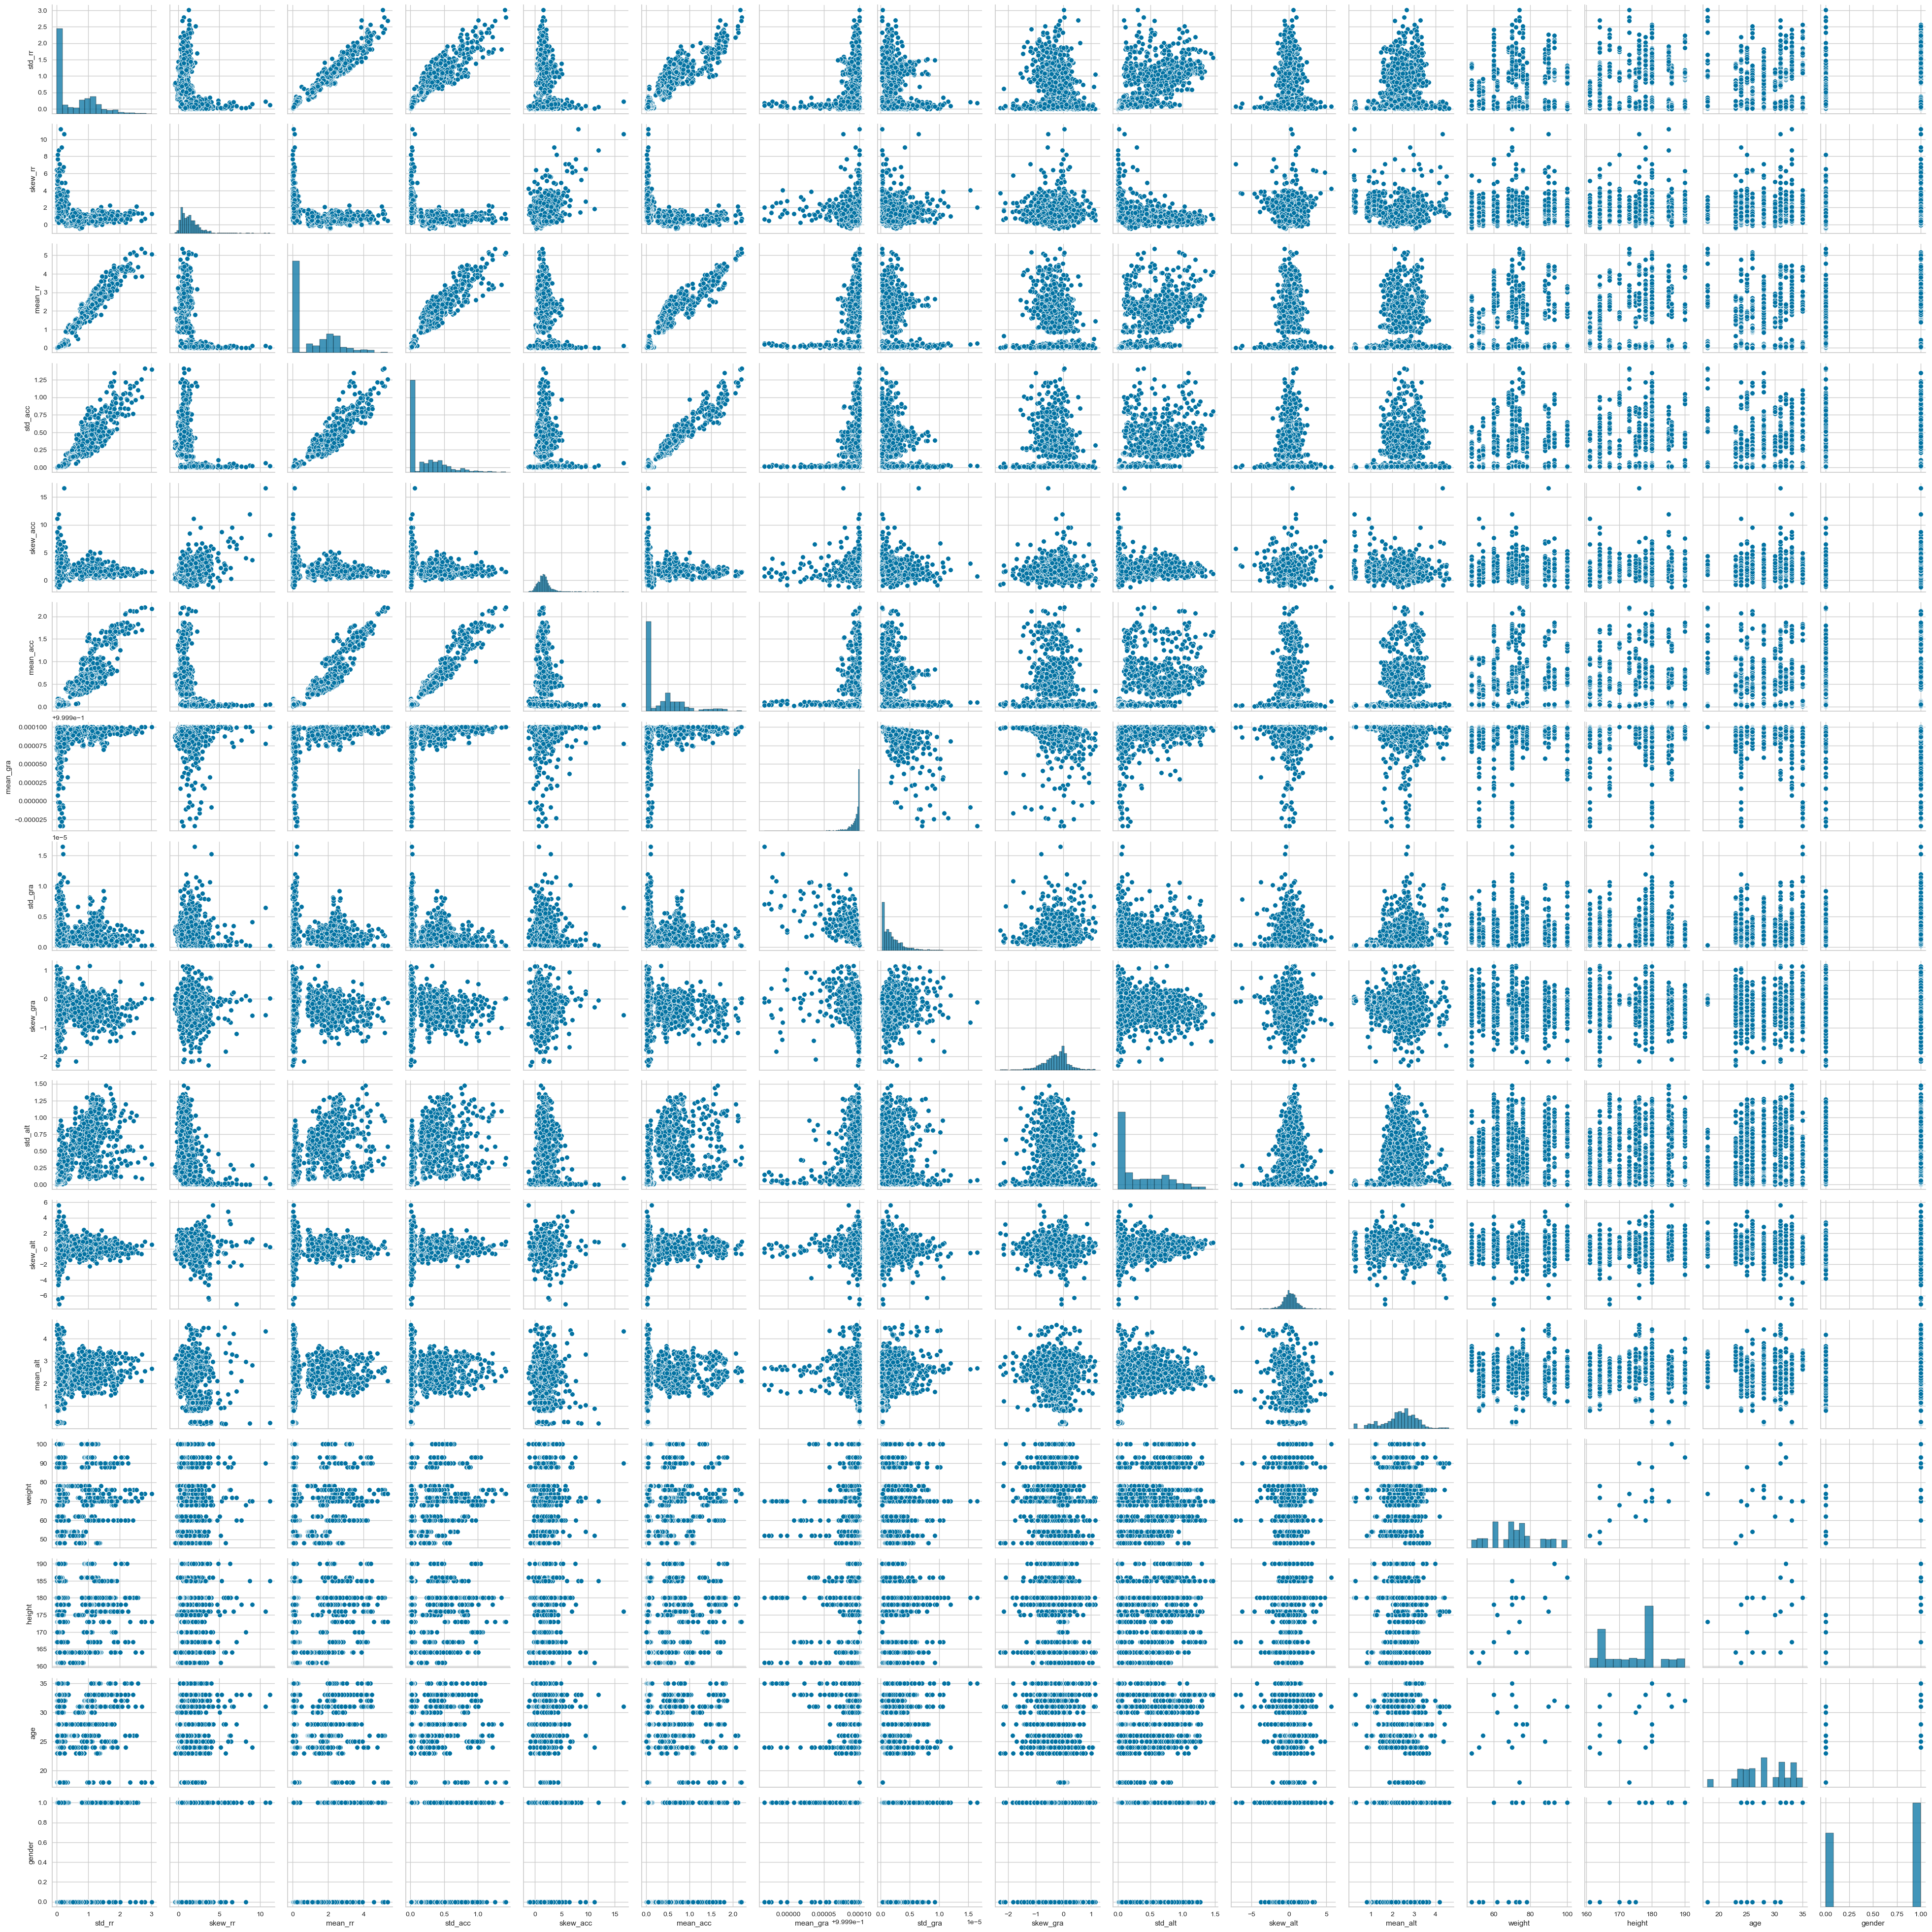

In [54]:
sns.pairplot(X_modelData)

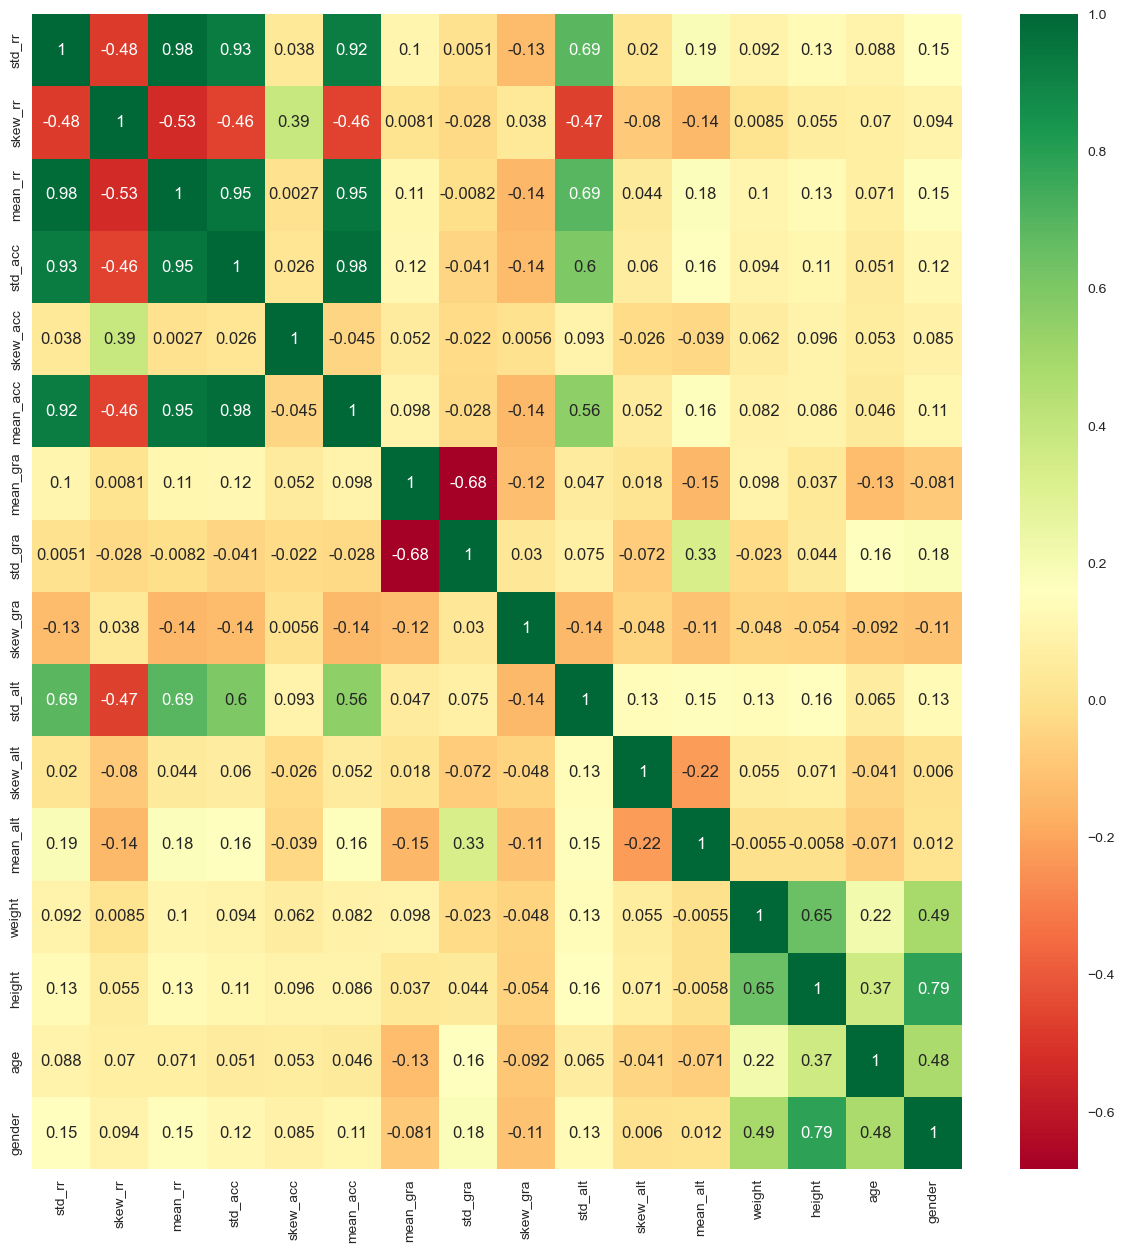

In [55]:
plt.figure(figsize=(15,15))
p=sns.heatmap(X_modelData.corr(), annot=True,cmap='RdYlGn')

std_rr   skew_rr   mean_rr   std_acc  skew_acc  mean_acc  mean_gra  \
0     1.748106  0.517456  3.438953  0.744422  1.358359  1.341491  0.999998   
1     1.879990  0.667456  3.338453  0.725367  1.452723  1.357286  0.999999   
2     1.842166  0.507401  3.397769  0.736906  1.155537  1.345896  0.999998   
3     1.719484  0.434231  3.396546  0.857834  1.459817  1.427181  0.999995   
4     2.010084  0.939107  3.401357  0.844539  1.948492  1.256208  0.999989   
...        ...       ...       ...       ...       ...       ...       ...   
1321  0.514151  0.967330  1.116105  0.155289  1.782710  0.280606  0.999989   
1322  1.133945  0.389760  2.341492  0.301602  1.621510  0.509455  0.999998   
1323  1.071709  0.599570  2.221510  0.313530  1.826093  0.472693  0.999997   
1324  1.075594  0.381100  2.241110  0.296935  1.720472  0.477941  0.999997   
1325  1.114989  0.414306  2.338265  0.350461  2.124422  0.533376  0.999994   

           std_gra  skew_gra   std_alt  skew_alt  mean_alt  weight  height  \
0     9.988318e-07 -0.220877  0.284362  0.611516  1.732835      72     164   
1     7.113302e-07 -0.614512  0.256773  0.610407  1.638638      72     164   
2     1.300188e-06  0.277300  0.239454  0.543890  1.577207      72     164   
3     1.319921e-06 -0.389060  0.209487  0.670914  1.473538      72     164   
4     2.856382e-06  0.606145  0.709563 -1.557875  2.900988      72     164   
...            ...       ...       ...       ...       ...     ...     ...   
1321  1.653505e-06 -0.166521  0.653300 -0.858091  2.830717      52     161   
1322  1.171201e-06  0.097870  0.812717 -1.074722  2.964166      93     190   
1323  1.536029e-06 -0.648544  0.942723 -0.465778  2.612223      93     190   
1324  1.314398e-06 -0.688313  1.082963  0.041514  2.470067      93     190   
1325  2.132344e-06  0.071853  0.801252 -1.336689  2.956879      93     190   

      age  gender  
0      31       0  
1      31       0  
2      31       0  
3      31       0  
4      31       0  
...   ...     ...  
1321   24       0  
1322   32       1  
1323   32       1  
1324   32       1  
1325   32       1  

[1326 rows x 16 columns]

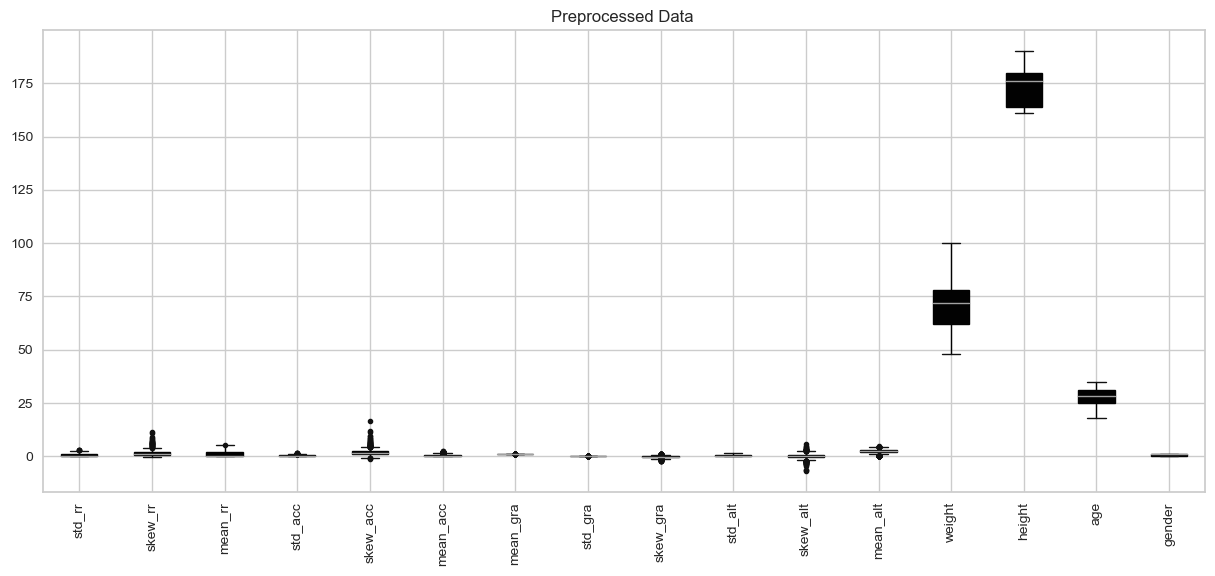

In [56]:
 # ploting to visulaize Outliers column-wise
plt.subplots(figsize=(15,6))
X_modelData.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)
plt.title('Preprocessed Data ')

X_modelData

# PCA

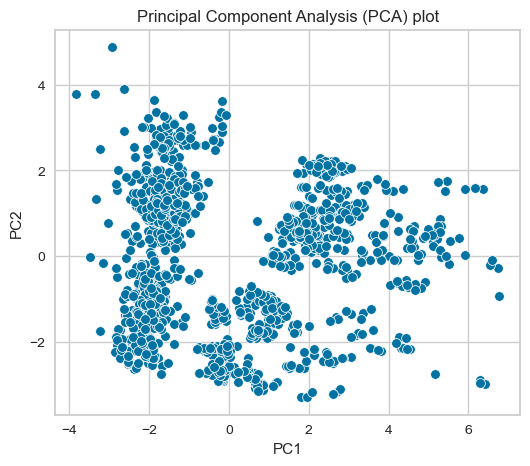

[1, 2, 3, 4, 5, 6]
cum_sum_eigenvalues [ 30.14  46.17  58.07  65.79  72.7   78.92  84.5   88.25  91.73  94.5
  96.61  98.31  99.35  99.82  99.96 100.01]


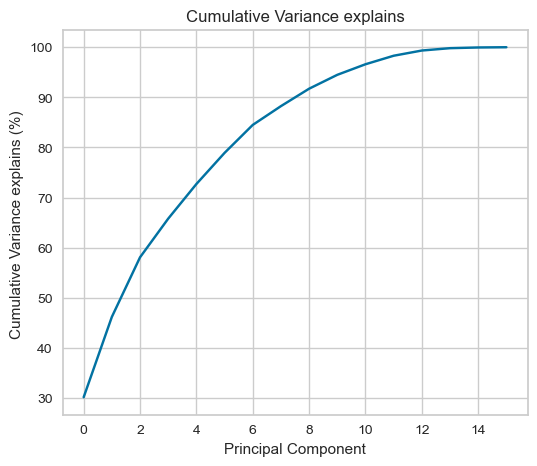

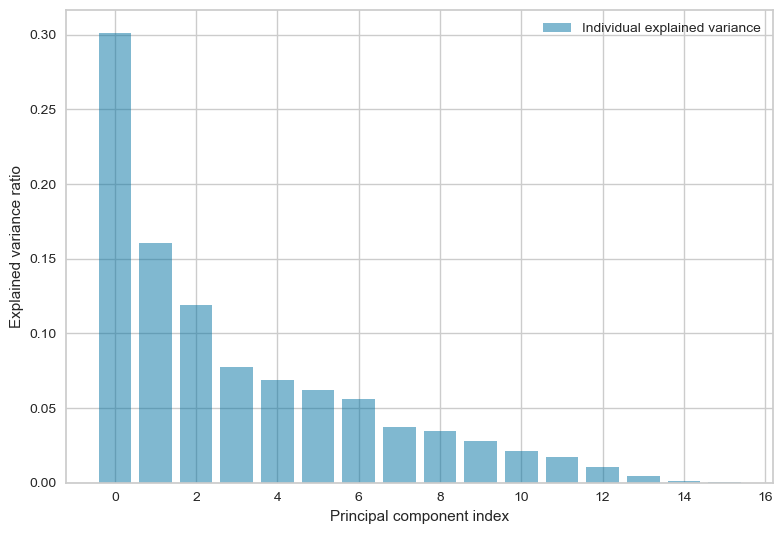

In [57]:
# perform pca for the data 

# referance 1 : https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ 
# referance 2 : https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
# Referance 3 : https://vitalflux.com/pca-explained-variance-concept-python-example/#google_vignette

from sklearn.decomposition import PCA

pca = PCA(n_components=16)   # n = number of features 
pca_score = pca.fit_transform(X_modelData_scaled)

pc1_Modelvalues = pca_score[:,0]
pc2_Modelvalues = pca_score[:,1]
pc3_Modelvalues = pca_score[:,2]

plt.figure(figsize=(6,5))
sns.scatterplot(x=pc1_Modelvalues, y=pc2_Modelvalues)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Component Analysis (PCA) plot')
plt.show()


taskinfo =df_model.task_info
#first_variable=pc1_Modelvalues
#second_variable=pc2_Modelvalues
#Third_variable=pc3_Modelvalues

#print(taskinfo, first_variable,second_variable,Third_variable )


# Extract DayNumbers and setting its Legend for ploting 
 
unique_taskinfo = list(set(taskinfo))
print(unique_taskinfo)
#  1.sit 2. stand 3. upstair 4. downstair 5. walk 6. jogg
taskinfoplot=["sit","stand","upstair","downstair","walk","jogg"]   # [1, 2, 3, 4, 5, 6]

# 2D Scatter plot of Raw data using Day No 
colors = [plt.cm.jet(float(i)/max(unique_taskinfo)) for i in unique_taskinfo]




#The amount of variance that each PC explains
#var=pca.explained_variance_ratio_                    # ref 2 

# Cumulative Variance explains
cum_sum_eigenvalues=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print('cum_sum_eigenvalues',cum_sum_eigenvalues)

plt.figure(figsize=(6,5))
plt.plot(cum_sum_eigenvalues)
plt.grid(True)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance explains (%) ')
plt.title('Cumulative Variance explains')
plt.show()



exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [58]:
# ref 3 (loading vector) :  https://www.jcchouinard.com/python-pca-biplots-machine-learning/

# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature_names = data_features
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')

loadings_df

PC1       PC2       PC3       PC4       PC5       PC6  \
feature_names                                                               
std_rr         0.438242 -0.055788  0.003275  0.101890  0.058807 -0.056193   
skew_rr       -0.263470  0.189583 -0.108486  0.445110  0.159457  0.075392   
mean_rr        0.445116 -0.064131 -0.005801  0.057209  0.047766 -0.047916   
std_acc        0.430179 -0.074593 -0.030271  0.084823  0.067394 -0.051586   
skew_acc      -0.009116  0.133471 -0.121272  0.680547  0.436959  0.065784   
mean_acc       0.425745 -0.086869 -0.012269  0.051743  0.035452 -0.053332   
mean_gra       0.049107 -0.086752 -0.596919  0.102772 -0.296522 -0.025841   
std_gra        0.007543  0.138135  0.631755  0.002101  0.141034  0.093136   
skew_gra      -0.090573 -0.049476  0.069685 -0.089734  0.338593 -0.864783   
std_alt        0.342092 -0.005756  0.027276  0.002447  0.149885  0.100972   
skew_alt       0.035821  0.008812 -0.165078 -0.449101  0.531521  0.408829   
mean_alt       0.099748 -0.028026  0.376473  0.255810 -0.454148  0.062656   
weight         0.091692  0.426159 -0.159137 -0.128562 -0.158645 -0.150449   
height         0.107315  0.533771 -0.106508 -0.103527 -0.082740 -0.103249   
age            0.057880  0.375885  0.074799 -0.015768  0.058449  0.083615   
gender         0.108619  0.536790  0.011833 -0.044229 -0.054586 -0.016997   

                    PC7       PC8       PC9      PC10      PC11      PC12  \
feature_names                                                               
std_rr         0.064058  0.079963 -0.004406 -0.012185  0.065489 -0.004508   
skew_rr        0.030230  0.454109  0.057256  0.018574  0.632904  0.190073   
mean_rr        0.056282  0.090000 -0.027332 -0.001694  0.020837 -0.015987   
std_acc        0.066170  0.254204 -0.026936  0.080036 -0.056391 -0.015514   
skew_acc      -0.191218 -0.243046 -0.034005  0.061137 -0.438518 -0.107818   
mean_acc       0.095152  0.329124 -0.033237  0.099421 -0.018328 -0.014235   
mean_gra      -0.041997 -0.108852  0.300011 -0.104892  0.191860 -0.617269   
std_gra       -0.082092  0.017865 -0.121787 -0.000992  0.220394 -0.682742   
skew_gra      -0.098306 -0.017588  0.307941 -0.026891  0.071573 -0.023301   
std_alt       -0.177539 -0.638238 -0.017435 -0.196399  0.513675  0.247282   
skew_alt      -0.332177  0.203283  0.397064  0.064196 -0.039615 -0.033943   
mean_alt      -0.423931  0.058983  0.587993  0.065453 -0.083938  0.171499   
weight        -0.366298 -0.045559 -0.270516  0.675039  0.108543 -0.027341   
height        -0.171791  0.047772 -0.018407 -0.294527 -0.127453  0.096627   
age            0.659241 -0.244257  0.464596  0.351969 -0.005947  0.011443   
gender         0.061537  0.136495  0.015327 -0.504446 -0.088606 -0.043599   

                   PC13      PC14      PC15      PC16  
feature_names                                          
std_rr        -0.030081 -0.663085  0.295630  0.494838  
skew_rr        0.046777 -0.035337  0.004698 -0.052283  
mean_rr       -0.030366 -0.357886 -0.324947 -0.736596  
std_acc        0.078116  0.478113  0.660081 -0.210040  
skew_acc      -0.027131  0.022063 -0.053434  0.021458  
mean_acc       0.043613  0.379377 -0.605306  0.403903  
mean_gra       0.026547  0.036118 -0.007738  0.008559  
std_gra        0.127590  0.016697  0.003525 -0.002636  
skew_gra      -0.045942  0.023503 -0.008789 -0.003875  
std_alt       -0.021287  0.209146 -0.029499  0.041339  
skew_alt      -0.042890 -0.044965  0.002909  0.001696  
mean_alt      -0.045475  0.009622 -0.004010 -0.008188  
weight        -0.205063 -0.021887  0.012577  0.001206  
height         0.718792 -0.047332 -0.024782  0.005191  
age            0.067946  0.015680 -0.006701 -0.006614  
gender        -0.632819  0.083810  0.013106  0.012936

In [59]:
feature_names

['std_rr',
 'skew_rr',
 'mean_rr',
 'std_acc',
 'skew_acc',
 'mean_acc',
 'mean_gra',
 'std_gra',
 'skew_gra',
 'std_alt',
 'skew_alt',
 'mean_alt',
 'weight',
 'height',
 'age',
 'gender']

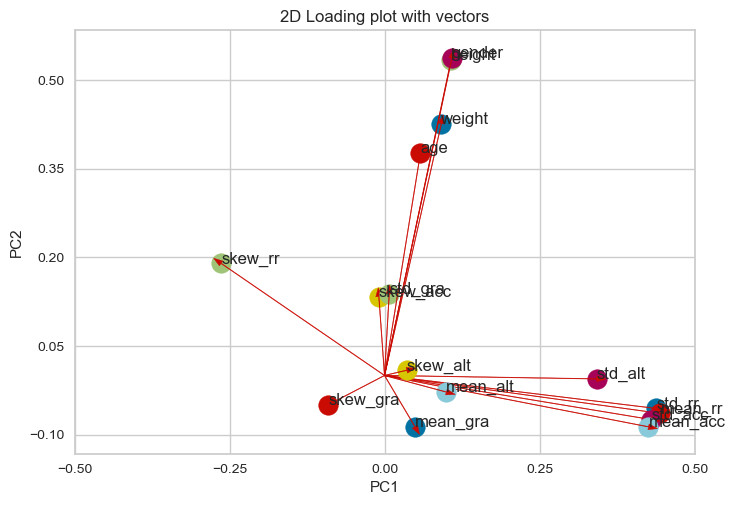

In [60]:
# Ref 3 : continued 

import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
 # Define the axes
xticks = np.linspace(-0.5, 0.5, num=5)
yticks = np.linspace(-0.1, 0.5, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()